In [1]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [39]:
nb_pts1 = 10
nb_pts2 = 7
dim = 2

o1 = torch.tensor([0,0]).float()
o2 = torch.tensor([10,0]).float()
origin = [o1,o2]
r1 = 2
r2 = 1
radius = [r1, r2]
nb_pts = [nb_pts1, nb_pts2]
source = mm.multipleCircles(origin, radius, nb_pts)

origin_target = [o2, o1]
target = mm.multipleCircles(origin_target, [r2, r1], nb_pts)

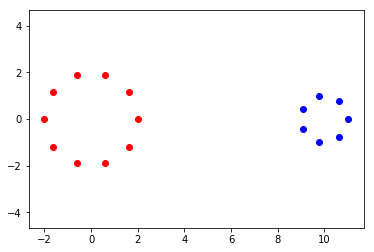

In [17]:
plt.scatter(gd_list[0][:, 0].detach().numpy(), gd_list[0][:, 1].detach().numpy(), c='red')
plt.scatter(gd_list[1][:, 0].detach().numpy(), gd_list[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [34]:
# Defining the deformation modules
sigma1 = 10
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=gd_list[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)

sigma2 = 10
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=gd_list[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)

module_list = [trans1, trans2]
sigma_bg = 1
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

sigma_bg = 0.1

In [35]:
# defining cotangent variable
# needed to prevent that everything is symmetric (gradient would be zero and nothing moves)
modules.manifold.fill_cotan( [*[torch.rand(gd.shape) for gd in modules.manifold.gd[:-1]], [torch.rand(gd.shape) for gd in modules.manifold.gd[-1]]])

In [36]:
constr_Id = dm.constraints.Identity()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

In [63]:
my_model = dm.models.ModelMultishapePointsRegistration(source, [trans1, trans2], sigma_bg,  target, dm.attachement.L2NormAttachement_multi(), constr_Id)
costs = my_model.fit(target, lr=1e-4, l=50., max_iter=400, log_interval=5)

It: 0, deformation cost: 12.360268, attach: 1391.753906. Total cost: 1404.114136
It: 5, deformation cost: 31.091049, attach: 1129.315674. Total cost: 1160.406738
It: 10, deformation cost: 31.307905, attach: 1127.575806. Total cost: 1158.883667
It: 15, deformation cost: 31.486729, attach: 1126.174683. Total cost: 1157.661377
It: 20, deformation cost: 31.516426, attach: 1125.954712. Total cost: 1157.471191
It: 25, deformation cost: 31.805880, attach: 1123.566772. Total cost: 1155.372681
It: 30, deformation cost: 66.144142, attach: 921.508667. Total cost: 987.652832
It: 35, deformation cost: 66.151527, attach: 921.444336. Total cost: 987.595886
It: 40, deformation cost: 66.142731, attach: 921.519653. Total cost: 987.662354
It: 45, deformation cost: 748521531637760.000000, attach: 141081280.000000. Total cost: 748521665855488.000000


RuntimeError: Lapack Error in gesv : U(3,3) is zero, singular U. at /opt/conda/conda-bld/pytorch_1544174967633/work/aten/src/TH/generic/THTensorLapack.cpp:155

In [67]:
my_model.shot_manifold.gd

[tensor([  -21699.7148,     6288.0503,    72512.2969,    37263.6875,
           -82147.9453,   -89777.1250,    10656.9766,    31965.9336,
           -51101.5742,    16705.4844,   195031.8750,   -52736.7148,
         -1711743.8750,  1073955.7500,  1709118.1250,  -933005.5625,
           -64673.0078,  -109787.6875,   -55941.7734,    19137.5547],
        requires_grad=True),
 tensor([12.8900,  2.8711, 12.5587,  3.6524, 11.7320,  3.8200, 11.0314,  3.2465,
         10.9839,  2.3626, 11.6265,  1.8354, 12.4754,  2.0625],
        requires_grad=True),
 [tensor([-21699.7129, -21701.1094, -21700.1562, -21699.9004, -21701.1680,
          -21699.1016, -21702.3633, -21699.0176, -21703.2852, -21699.6797,
          -21703.5742, -21700.8320, -21703.1250, -21702.0410, -21702.1133,
          -21702.8418, -21700.9219, -21702.9277, -21700.0059, -21702.2656],
         requires_grad=True),
  tensor([6298.7607, 6288.4648, 6298.4146, 6289.2461, 6297.5820, 6289.4224,
          6296.8887, 6288.8594, 6296.8574, 6

In [68]:
modules.manifold.gd


[tensor([-4.5907e+17,  4.4751e+17, -4.5907e+17,  4.4751e+17, -4.5907e+17,
          4.4751e+17, -4.5907e+17,  4.4751e+17, -4.5907e+17,  4.4751e+17,
         -4.5907e+17,  4.4751e+17, -4.5907e+17,  4.4751e+17, -4.5907e+17,
          4.4751e+17, -4.5907e+17,  4.4751e+17, -4.5907e+17,  4.4751e+17],
        grad_fn=<AddBackward0>),
 tensor([ 1.3708e+12, -4.0258e+12,  1.3708e+12, -4.0258e+12,  1.3708e+12,
         -4.0258e+12,  1.3708e+12, -4.0257e+12,  1.3708e+12, -4.0257e+12,
          1.3709e+12, -4.0257e+12,  1.3709e+12, -4.0258e+12],
        grad_fn=<AddBackward0>),
 [tensor([ 2.0000e+00,  0.0000e+00,  1.6180e+00,  1.1756e+00,  6.1803e-01,
           1.9021e+00, -6.1803e-01,  1.9021e+00, -1.6180e+00,  1.1756e+00,
          -2.0000e+00,  2.4493e-16, -1.6180e+00, -1.1756e+00, -6.1803e-01,
          -1.9021e+00,  6.1803e-01, -1.9021e+00,  1.6180e+00, -1.1756e+00],
         requires_grad=True),
  tensor([11.0000,  0.0000, 10.6235,  0.7818,  9.7775,  0.9749,  9.0990,  0.4339,
           9.0

In [ ]:
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)
manifold_t, controls_t = dm.shooting.shoot_euler(, it=10)